In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
runnum = 13
endyear = 2021
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [7]:
total

,2016,2017,2018,2019,2020,2021
5,95,21,23,12.0,50,27.0
3,637,280,359,5.0,3086,NaN
125,2275,1311,1257,1024.0,8275,5.0
99,474,357,331,353.0,7231,NaN
161,488,548,641,535.0,907,958.0
115,178,34,20,NaN,834,NaN
147,211,112,33,23.0,199,NaN
93,712,364,110,179.0,1871,NaN


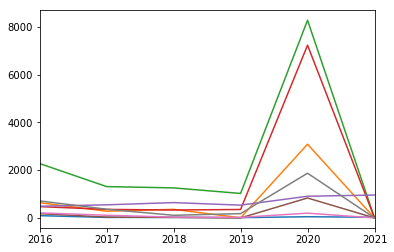

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot()

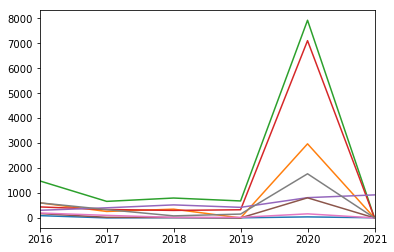

In [9]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot()

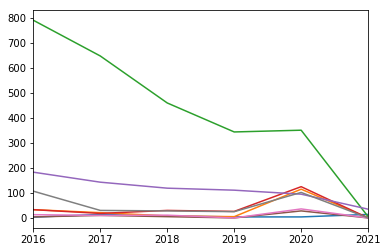

In [10]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot()

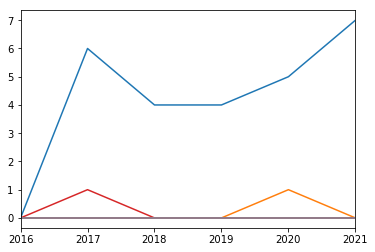

In [11]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot()

In [12]:
b2020 = store['2020/buildings']

In [13]:
b2020.year_built.value_counts(sort=False)

0       379230
1644         2
1656         2
1690         1
1760         1
1780         2
1790         5
1791         1
1795         4
1800       213
1803         8
9999        19
1805         2
1806         2
1807         1
1808         8
1810        22
1811         8
1812         1
1813         1
1814         1
1816         2
1818         5
1819         5
1820        42
1821        16
1822        22
1823        15
1824         8
1825        19
         ...  
1991     13874
1992     13815
1993     14132
1994     16229
1995     17117
1996     18996
1997     19419
1998     20317
1999     19943
2000     19944
2001     16667
2002     16122
2003     16192
2004     15407
2005     13428
2006      7665
2007      4191
2008       316
2009       192
2010      2320
2011      3028
2012      4284
2013      5711
2014      5056
2015      5145
2016      5070
2017      3027
2018      2774
2019      2131
2020     22453
Name: year_built, Length: 225, dtype: int64